In [1]:
import pandas as pd
import import_ipynb
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


importing Jupyter notebook from encode.ipynb


In [2]:
clf = tree.DecisionTreeClassifier()


In [3]:
df = pd.read_excel("transformed6.xlsx")
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
#df

In [7]:
df = df.fillna(df.mean())
df1 = df.fillna(method='ffill')
#df1 = df1.drop(['Engine Size', 'Engine Block', 'Auto In The Market: New', 'Auto In The Market: Used', 'Model 1', 'Engine Cylinders', 'Drive Type', 'Fuel Type', 'Make 1', 'Unnamed: 0'], axis=1)

In [9]:
ysplit = df1['Vehicle Type']
xsplit = df1.drop(['Vehicle Type'],axis=1)
dt = xsplit.select_dtypes(include=['datetime64'])
cat2 = list(dt.columns)
categorical = xsplit.select_dtypes(exclude=['float64'])
cat3 = list(categorical.columns)
cols = cat2 + cat3
le = preprocessing.LabelEncoder()
xsplit[cols] = xsplit[cols].apply(lambda col: le.fit_transform(col))
#xsplit = pd.get_dummies(xsplit, columns=cols)
#xsplit

In [11]:
#xsplit

In [7]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(xsplit,ysplit)

In [8]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xsplit.columns)
fes = pd.concat([dfcolumns,dfscores],axis=1)
fes.columns = ['Specs','Score']
fes.nlargest(15,'Score')
fes = fes.sort_values(by =['Score'],ascending=False)
large = fes.head(10)

corr = large['Specs'].values
xsplit1 = xsplit[corr]        

In [9]:
#fes

In [10]:
xtrain, xtest = train_test_split(xsplit1, test_size=0.2, shuffle=False)
ytrain, ytest = train_test_split(ysplit, test_size=0.2, shuffle=False)

In [11]:
#param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
#clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=4) 

clf = clf.fit(xtrain,ytrain)

In [12]:
ypred = clf.predict(xtest)

In [13]:
accuracy_score(ytest,ypred

0.9695

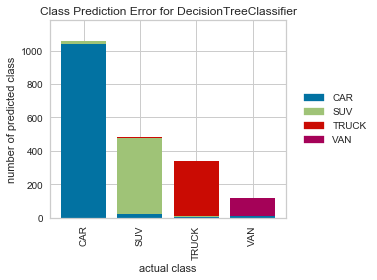

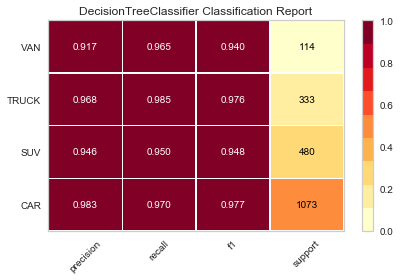

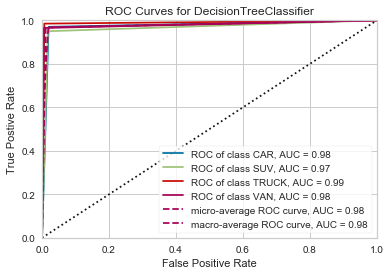

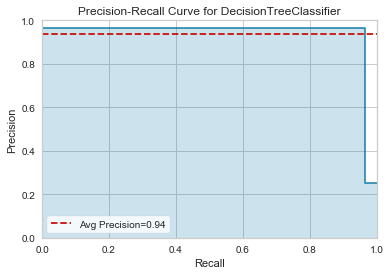

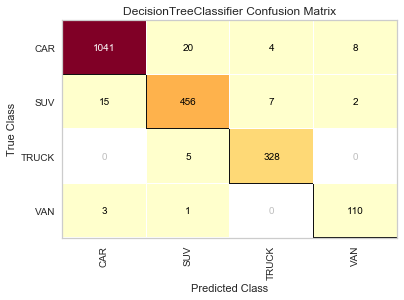

In [16]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
model = tree.DecisionTreeClassifier()
viz = ClassPredictionError(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

classes = ["CAR", "SUV", "TRUCK", "VAN"]
viz = ClassificationReport(model, classes=classes, support=True)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["CAR", "SUV", "TRUCK", "VAN"]
viz = ROCAUC(model, classes=classes)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
viz = PrecisionRecallCurve(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["CAR", "SUV", "TRUCK", "VAN"]
viz = ConfusionMatrix(model,classes=classes,label_encoder={0: 'CAR', 1: 'SUV', 2: 'TRUCK', 3: 'VAN'})
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()